In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



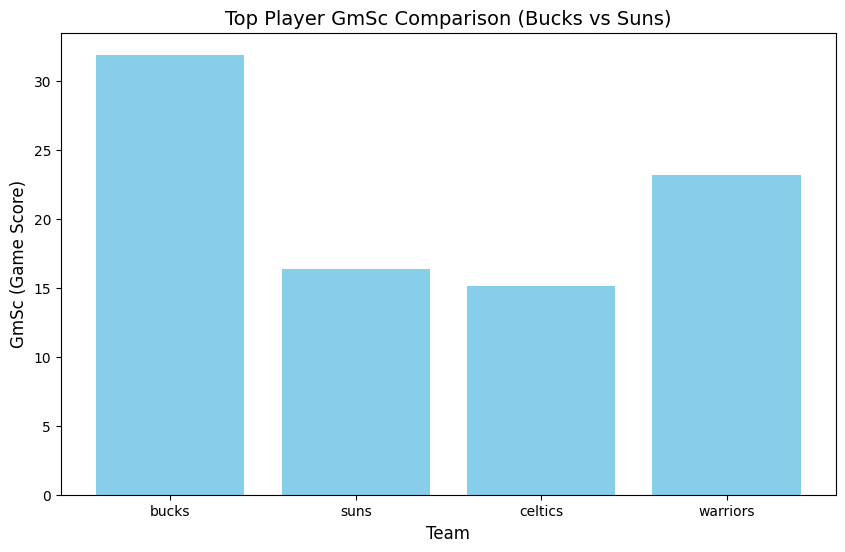

In [20]:
# Load data
folder_path = 'nbafinalsplayersstatsL5years'

team_files = ['bucks2021finals.csv', 'suns2021finals.csv', 'celtics2022finals.csv', 'warriors2022finals.csv']  # Update with actual file names

top_players = []

for file in team_files:
    df = pd.read_csv(f'{folder_path}/{file}')
    top_player = df.sort_values(by='GmSc', ascending=False).iloc[0]
    team_name = file.split('202')[0]  # Extract team name from the file name
    top_players.append({'Team': team_name, 'Player': top_player['Player'], 'GmSc': top_player['GmSc']})

# Create DataFrame
top_players_df = pd.DataFrame(top_players)

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(top_players_df['Team'], top_players_df['GmSc'], color='skyblue')
plt.xlabel('Team', fontsize=12)
plt.ylabel('GmSc (Game Score)', fontsize=12)
plt.title('Top Player GmSc Comparison (Bucks vs Suns)', fontsize=14)
plt.show()

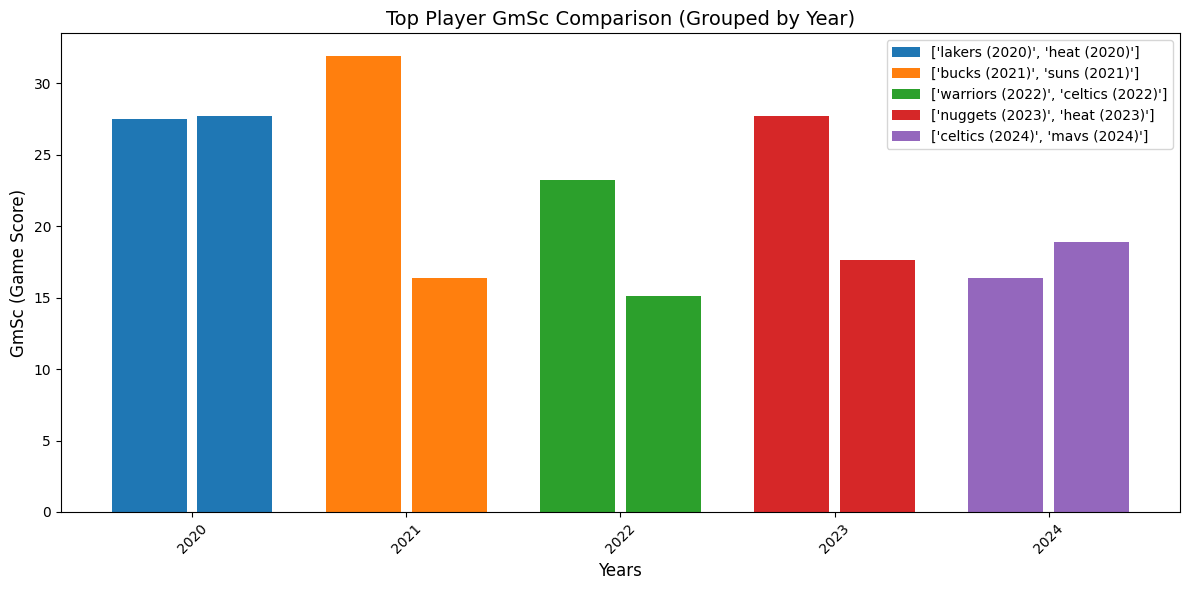

In [35]:
import numpy as np

# Load data
folder_path = 'nbafinalsplayersstatsL5years'  # Adjust folder path
team_files = ['lakers2020finals.csv', 'heat2020finals.csv', 'bucks2021finals.csv', 'suns2021finals.csv', 'warriors2022finals.csv', 'celtics2022finals.csv', 'nuggets2023finals.csv', 'heat2023finals.csv', 'celtics2024finals.csv', 'mavs2024finals.csv']  # Add all relevant files

top_players = []

# Loop through files to extract top players
for file in team_files:
    full_path = f'{folder_path}/{file}'
    df = pd.read_csv(full_path)
    top_player = df.sort_values(by='GmSc', ascending=False).iloc[0]
    team_name = file.split('202')[0].strip()  # Extract team name
    year = file.split('finals')[0][-4:]  # Extract last 4 digits before 'finals'
    top_players.append({'Year': year, 'Team': team_name, 'Player': top_player['Player'], 'GmSc': top_player['GmSc']})

# Create DataFrame
top_players_df = pd.DataFrame(top_players)

# Group data by year and create bar positions
years = sorted(top_players_df['Year'].unique())
teams_per_year = len(top_players_df) // len(years)
x = np.arange(len(years))  # Positions for each group of bars
width = 0.35  # Width of each bar
gap = 0.05  # Gap between bars within the same group

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar positions and draw bars
for i, year in enumerate(years):
    year_data = top_players_df[top_players_df['Year'] == year]
    offsets = np.arange(len(year_data)) * (width + gap) - (len(year_data) - 1) * (width + gap) / 2
    bar_positions = x[i] + offsets
    ax.bar(bar_positions, year_data['GmSc'], width, label=[f"{team} ({year})" for team in year_data['Team']])
    
# Customize plot
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('GmSc (Game Score)', fontsize=12)
ax.set_title('Top Player GmSc Comparison (Grouped by Year)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()
